In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine learning tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
!pip install kneed

In [6]:
# Kneedle algorithm for elbow point detection
from kneed import KneeLocator

In [ ]:
# Load dataset

In [7]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target 

In [8]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Basic exploration

In [9]:
print("First 5 rows of the dataset:")
print(X.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [10]:
print("\nDataset Description:")
print(X.describe())


Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [11]:
print("\nCheck for Missing Values:")
print(X.isnull().sum())


Check for Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
# EDA: Scatter plot of feature pairs

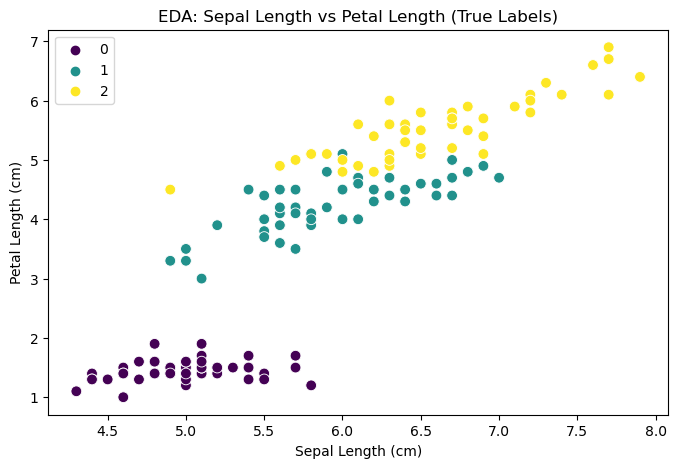

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=y_true, palette='viridis', s=60)
plt.title('EDA: Sepal Length vs Petal Length (True Labels)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [ ]:
# Split data into training and testing

In [13]:
X_train, X_test, y_train_true, y_test_true = train_test_split(X, y_true, test_size=0.2, random_state=42, stratify=y_true)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Test set size: 30 samples


In [ ]:
# Standardize features (fit on train, transform on test)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575],
       [ 0.54731923, -1.22765467,  0.69841284,  0.91510102],
       [-0.2885865 , -0.77987789,  0.24416059,  0.12508575],
       [ 0.54731923, -0.5559895 ,  0.75519438,  0.38842418],
       [ 2.21913069, -0.10821272,  1.3230097 ,  1.44177787],
       [ 2.21913069,  1.6828944 ,  1.66369889,  1.31010866],
       [ 2.09971558, -0.10821272,  1.60691736,  1.17843945],
       [ 0.18907392, -0.33210111,  0.41450518,  0.38842418],
       [-1.00507713, -2.34709662, -0.15331014, -0.26992188],
       [-0.04975629, -0.77987789,  0.18737906, -0.26992188],
       [-0.04975629, -1.00376628,  0.13059752, -0.00658346],
       [-1.36332244,  0.33956406, -1.23215924, -1.32327558],
       [-0.88566202,  1.

In [16]:
X_test_scaled

array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558],
       [ 0.54731923,  0.56345245,  0.52806825,  0.52009339],
       [-1.48273754,  1.23511762, -1.57284844, -1.32327558],
       [-0.52741671,  0.78734084, -1.17537771, -1.32327558],
       [ 0.78614944, -0.10821272,  0.81197591,  1.04677024],
       [-0.52741671, -0.10821272,  0.41450518,  0.38842418],
       [ 1.74147027, -0.33210111,  1.43657276,  0.78343181],
       [ 1.26380985,  0.11567567,  0.75519438,  1.44177787],
       [ 0.78614944, -0.10821272,  1.1526651 ,  1.31010866],
       [ 0.66673433,  0.33956406,  0.41450518,  0.38842418],
       [-1.00507713,  0.78734084, -1.28894078, -1.32327558],
       [-1.00507713,  0.56345245, -1.34572231, -1.32327558],
       [-0.04975629,  2.

In [ ]:
# Calculate WCSS for different k values on training data

In [17]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
print("\nWCSS values for k=1 to 10 (Train Set):")
for k, w in zip(k_range, wcss):
    print(f"k={k}: WCSS={w:.4f}")

C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme


WCSS values for k=1 to 10 (Train Set):
k=1: WCSS=480.0000
k=2: WCSS=181.2279
k=3: WCSS=110.1953
k=4: WCSS=89.2772
k=5: WCSS=72.9976
k=6: WCSS=64.5847
k=7: WCSS=57.5706
k=8: WCSS=50.4533
k=9: WCSS=42.1585
k=10: WCSS=37.4553


In [ ]:
# Plot elbow curve

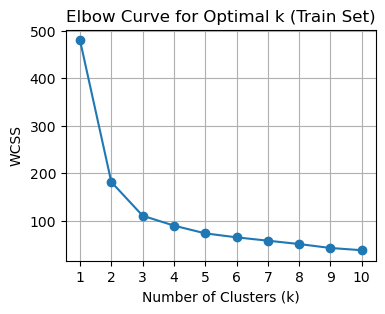

In [20]:
plt.figure(figsize=(4, 3))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Curve for Optimal k (Train Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# Use Kneedle algorithm to find optimal k

In [21]:
knee = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"\nOptimal number of clusters (Kneedle): {optimal_k}")


Optimal number of clusters (Kneedle): 3


In [ ]:
# Calculate silhouette scores for different k values

In [22]:
silhouette_scores = []
for k in k_range[1:]:  # Start from k=2, as silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)
print("\nSilhouette scores for k=2 to 10 (Train Set):")
for k, s in zip(k_range[1:], silhouette_scores):
    print(f"k={k}: Silhouette Score={s:.4f}")

C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme


Silhouette scores for k=2 to 10 (Train Set):
k=2: Silhouette Score=0.5759
k=3: Silhouette Score=0.4861
k=4: Silhouette Score=0.4142
k=5: Silhouette Score=0.3547
k=6: Silhouette Score=0.3315
k=7: Silhouette Score=0.3398
k=8: Silhouette Score=0.3381
k=9: Silhouette Score=0.3573
k=10: Silhouette Score=0.3550


In [ ]:
# Plot silhouette scores

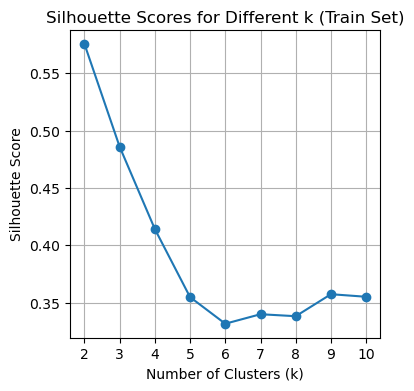

In [24]:
plt.figure(figsize=(4, 4))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k (Train Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range[1:])
plt.grid(True)
plt.show()

In [ ]:
# Apply K-means with optimal k

In [25]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_train_clusters = kmeans.fit_predict(X_train_scaled)
y_test_clusters = kmeans.predict(X_test_scaled)

C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
y_train_clusters

array([1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0,
       1, 0, 2, 2, 1, 1, 1, 1, 0, 1])

In [27]:
y_test_clusters

array([1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1])

In [ ]:
# Reduce dimensionality for visualization using PCA

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Colorful scatter plot of clusters (Test Set)

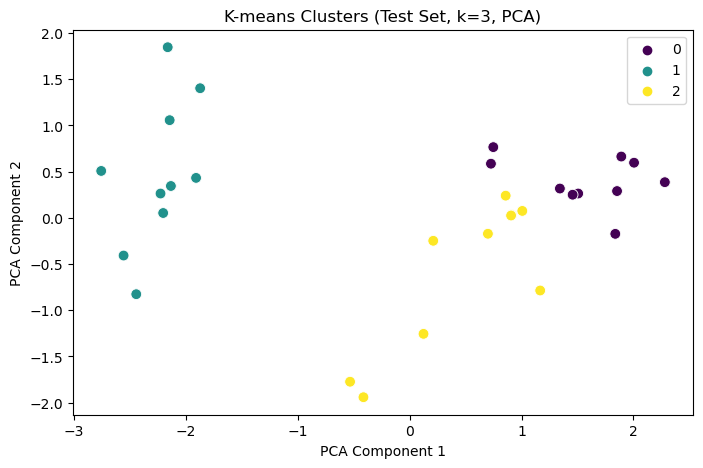

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test_clusters, palette='viridis', s=60)
plt.title(f'K-means Clusters (Test Set, k={optimal_k}, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Map cluster labels to mean feature values

In [30]:
X_train_copy = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
X_train_copy['Cluster'] = y_train_clusters
print("\nMean feature values per cluster (Train Set):")
print(X_train_copy.groupby('Cluster').mean())


Mean feature values per cluster (Train Set):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 1.267662          0.245675           1.077567   
1                -1.022989          0.820924          -1.301717   
2                 0.033103         -0.825569           0.380900   

         petal width (cm)  
Cluster                    
0                1.093492  
1               -1.250858  
2                0.329307  


## K-means ++

In [32]:
from sklearn.datasets import make_blobs

In [33]:
# Step 1: Create demo data (3 clusters)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

In [34]:
X

array([[ 4.28576743e-01,  4.97399710e+00],
       [ 1.61990909e+00,  6.76452867e-02],
       [ 1.43289271e+00,  4.37679234e+00],
       [-1.57846247e+00,  3.03445802e+00],
       [-1.65862863e+00,  2.26746029e+00],
       [-1.52172727e+00,  3.23408479e+00],
       [ 8.36856841e-01,  2.13635938e+00],
       [ 2.41008767e-01,  4.81040511e+00],
       [-2.10320664e+00,  2.44201184e+00],
       [-4.83580407e-01,  3.51451890e+00],
       [ 8.93499638e-01,  1.01093082e+00],
       [ 2.39564169e+00,  7.64058600e-01],
       [ 3.04414848e+00,  9.96200313e-01],
       [ 1.24258802e+00,  4.50399192e+00],
       [ 1.89462740e+00,  2.20856861e-01],
       [-1.65707376e+00,  3.18511821e+00],
       [ 1.21767506e+00,  3.89290127e+00],
       [ 1.20212540e+00,  3.64414685e+00],
       [-1.32356154e+00,  4.13050840e+00],
       [ 1.34195197e+00,  5.93573847e-01],
       [-1.79041773e+00,  3.02668532e+00],
       [ 1.16411070e+00,  3.79132988e+00],
       [ 1.36085437e+00,  7.10288309e-01],
       [ 4.

In [37]:
y_true

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2])

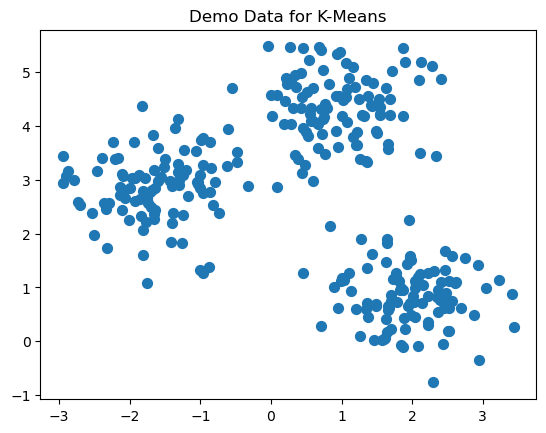

In [38]:
# Step 2: Plot the demo data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Demo Data for K-Means")
plt.show()

In [39]:
# Step 3: Apply K-Means clustering with k-means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amitm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [40]:
# Step 4: Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

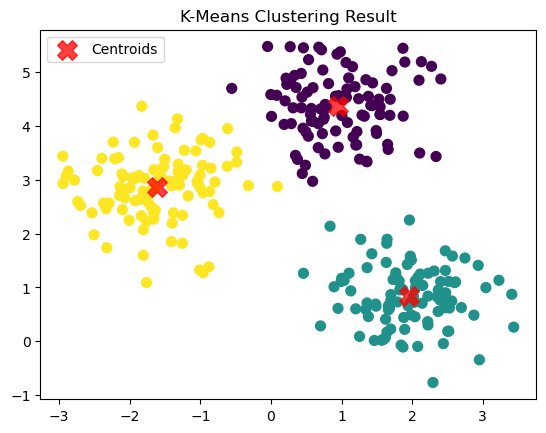

In [41]:
# Plot clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()

In [46]:
new_data = [[4, -6], [0, 4], [-2, -1]]
predicted_clusters = kmeans.predict(new_data)

In [47]:
print("New Data Points:", new_data)
print("Predicted Clusters:", predicted_clusters)

New Data Points: [[4, -6], [0, 4], [-2, -1]]
Predicted Clusters: [1 0 2]


In [48]:
import joblib

In [49]:
joblib.dump(kmeans,"k_means.pkl")

['k_means.pkl']

In [50]:
model= joblib.load("k_means.pkl")

In [51]:
model.predict([[1,0], [-1,-5],[0,-2]])

array([1, 1, 1])

In [53]:
import pickle